# KNeighborsRegressor
The Data has already been processed earlier. 
So I will use what I have.

## A First Pass

In [23]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import random 
random.seed(0)

pd.options.display.float_format = '{:.2f}'.format

In [24]:
os.getcwd()
#os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]

In [25]:
X_train.head()

,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,StateCode,Year1
757,2042.00,483.00,351357.00,3711.30,4271.80,25409.00,6615.00,483.00,1219.00,1301.00,1010009.00,9199.50,658652.00,649044.00,63.10,14,43
2094,0.00,25.00,14925.00,13.40,45.30,0.00,0.00,0.00,0.00,0.00,44842.00,94.60,29917.00,29443.00,0.10,41,3
2143,0.00,17.00,149682.00,45.90,91.70,0.00,0.00,0.00,0.00,0.00,302420.00,334.80,152738.00,140516.00,2.40,42,1
1112,68.00,173.00,19722.00,20.00,1080.40,5223.00,1360.00,173.00,134.00,141.00,87784.00,1754.50,68062.00,62003.00,82.40,21,41
1327,0.00,7.90,13432.00,23.70,35.20,0.00,0.00,0.00,0.00,0.00,53647.00,71.80,40215.00,37922.00,0.20,26,1


Created a pipeline here.

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    KNeighborsRegressor(weights='distance'))
y_pred=reg.fit(X_train, y_train).predict(X_test)

In [27]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1


,true,predicted,how_off
0,15518.20,14563.98,6.15
1,1128.00,1091.22,3.26
2,698.40,642.22,8.04
3,6897.00,6641.25,3.71
4,5579.60,5477.33,1.83
5,7697.60,7303.50,5.12
6,4476.50,4049.20,9.55
7,623.90,632.07,-1.31
8,2307.40,2054.80,10.95
9,3351.60,2974.84,11.24


The results were actually really good right out of the box


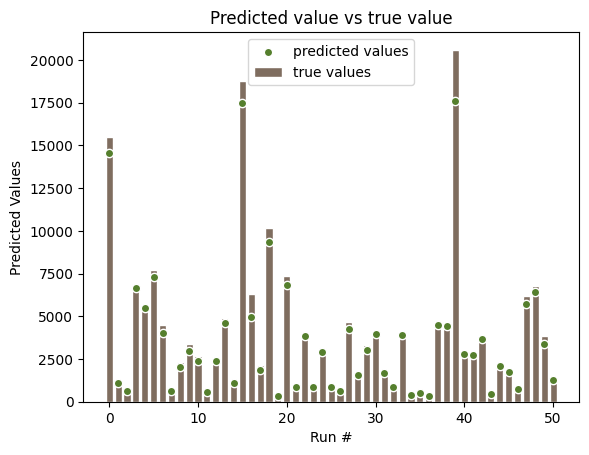

In [28]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [29]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 304.962649760933
Mean squared error 324398.3801414868
('Explained variance score', 0.9873327384716359)
('R_2 score', 0.9822565246398507)


## Parameter Optimazation

The model performed decently well.



In [30]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(KNeighborsTransformer(), KNeighborsRegressor(n_neighbors=i,weights='distance'))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T
 

<Axes: >

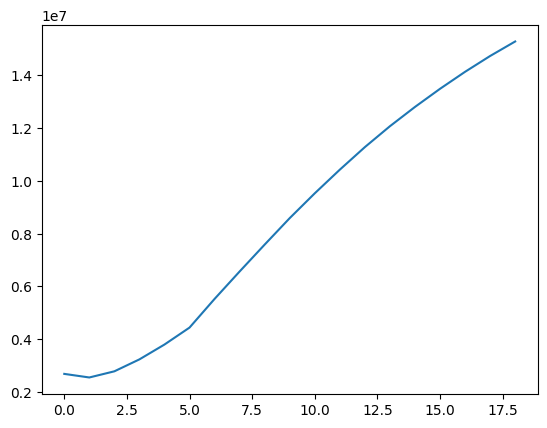

In [31]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [32]:
a

,0,1,2,3
0,918.05,2683516.24,0.90,0.85
1,1014.44,2547424.22,0.91,0.86
2,1111.45,2780677.24,0.92,0.85
3,1242.61,3233021.90,0.91,0.82
4,1379.69,3795207.78,0.90,0.79
5,1528.52,4437016.89,0.89,0.76
6,1710.33,5523157.62,0.86,0.70
7,1852.09,6562209.62,0.83,0.64
8,1990.88,7581459.38,0.80,0.59
9,2116.15,8584004.74,0.78,0.53


In [33]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i,weights='distance'))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

<Axes: >

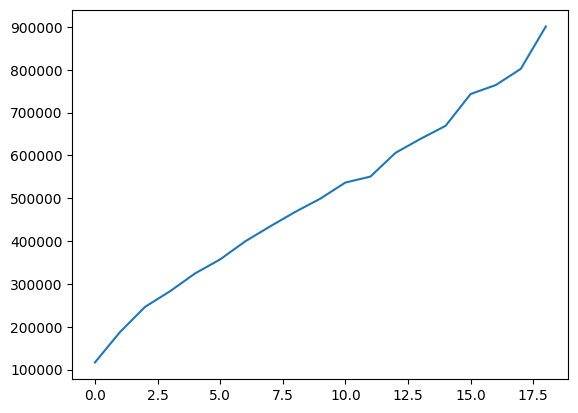

In [34]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [35]:
a

,0,1,2,3
0,199.84,116427.04,1.00,0.99
1,233.20,187289.93,0.99,0.99
2,259.29,246134.48,0.99,0.99
3,281.68,282784.42,0.99,0.98
4,304.96,324398.38,0.99,0.98
5,319.72,357105.71,0.99,0.98
6,339.76,399212.76,0.98,0.98
7,352.50,434387.49,0.98,0.98
8,364.97,468129.49,0.98,0.97
9,369.44,499066.29,0.98,0.97


Not much better. changing p value

In [36]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i,weights='distance',p=1))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

<Axes: >

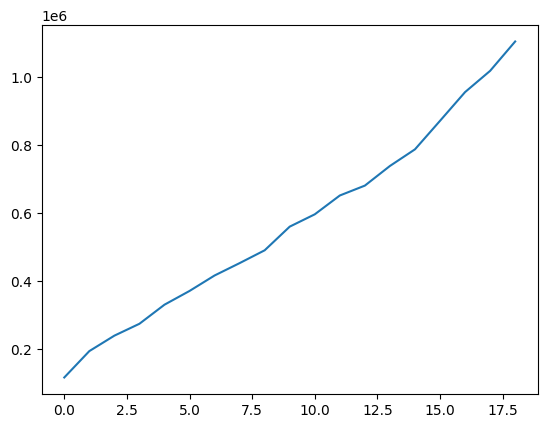

In [37]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [38]:
a

,0,1,2,3
0,199.85,117033.17,1.00,0.99
1,232.27,194491.09,0.99,0.99
2,247.91,239915.05,0.99,0.99
3,270.20,274808.70,0.99,0.98
4,301.30,330876.18,0.99,0.98
5,320.80,371229.15,0.99,0.98
6,338.11,416677.76,0.98,0.98
7,353.76,453033.20,0.98,0.98
8,369.82,490712.44,0.98,0.97
9,387.85,560237.14,0.98,0.97


In [39]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)

,true,predicted,how_off
0,15518.20,13792.32,11.12
1,1128.00,1243.32,-10.22


In [40]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 488.1959902534131
Mean squared error 1104249.8844236757
('Explained variance score', 0.9519135459995941)
('R_2 score', 0.9396013302927911)


### Changing the penatly term

Changing the penalty term from `l2` to `l1`. Improved results quite a bit. 

In [157]:
reg = make_pipeline(StandardScaler(),
                    KNeighborsRegressor(weights='distance',n_neighbors=1,p=1/2))
y_pred=reg.fit(X_train, y_train).predict(X_test)

c:\Users\amcfa\gitfiles\Projects\MastersWork\Machine_Learning_Prediction_Kneighborsreg\.venv\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


In [158]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head

<bound method NDFrame.head of        true  predicted  how_off
0  15518.20   15021.40     3.20
1   1128.00    1135.30    -0.65
2    698.40     648.30     7.17
3   6897.00    6834.00     0.91
4   5579.60    5632.10    -0.94
5   7697.60    7512.00     2.41
6   4476.50    4182.90     6.56
7    623.90     604.80     3.06
8   2307.40    2123.90     7.95
9   3351.60    3035.10     9.44
10  2696.10    2531.30     6.11
11   616.50     595.50     3.41
12  2612.40    2484.00     4.92
13  4921.10    4756.80     3.34
14  1142.20    1100.70     3.63
15 18772.30   18322.00     2.40
16  6289.80    5078.00    19.27
17  2131.70    1888.70    11.40
18 10161.80    8995.40    11.48
19   330.90     330.70     0.06
20  7339.60    6979.10     4.91
21   959.20     853.00    11.07
22  4092.40    3939.90     3.73
23   946.20     862.80     8.81
24  3138.30    3001.40     4.36
25   944.60     860.00     8.96
26   647.10     628.00     2.95
27  4647.90    4383.40     5.69
28  1651.80    1624.40     1.66
29  3320.2

In [ ]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [159]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 186.8901960784314
Mean squared error 111144.4768627452
('Explained variance score', 0.9956994403253784)
('R_2 score', 0.9939207794879534)


# Results
Pretty straightforward actually. 


The SVGR performed very well. With a prediction accuracy of 100%.

The `MAE` was 186.8901960784314\
The `MSE` was 111144.4768627452\
The `Explained variance` was 0.9956994403253784\
The $ R^2 $ was 0.9939207794879534